我尝试使用更小的数据集进行训练，还没有训练完。我们先开始继续下一步学习，使用新的colab。要求用学生听得懂的通俗易懂的语言为我进行讲解和指导我进行实践。编程环境基于google的colab。由于我对python基础不熟练，注意代码中都要有极尽细致详细的注释，保证我能看懂所有变量，函数，语法结构和每行语句的功能，以便我能进行实践复现。按照"step by step"原则逐步指导我，并及时根据我的反馈进行调整。

好的，完全没问题！我们继续前进。

你那边让CPU慢慢地“炖”着那个小模型，我们这边开一个新的Colab笔记本，学习下一步的技能。这个安排非常好，可以最大化我们的学习效率。

在第三步中，我们学会了如何扮演“老师”的角色，亲自训练一个模型。训练完成后，这个模型就成了我们专属的、带有我们心血的“毕业生”。那么，一个很自然的问题就来了：**这位“毕业生”的“毕业证”和“档案”在哪里？我们如何保存它们，以便将来能随时聘用它，或者把它推荐给别人（分享）呢？**

这就是我们第四步要学习的核心内容：**模型的保存、加载与分享**。

---

### **第四步：毕业与分享 —— 保存、加载及分享你的专属模型**

#### **1. 理论学习：模型的“毕业档案袋”里有什么？**

当我们训练好一个模型后，我们不能每次想用它的时候都重新训练一遍（那太浪费时间了！）。我们需要把它当时最好的状态“定格”下来，保存成文件。

这个“毕业档案袋”通常包含三个核心部分：

1.  **模型的“大脑” - 权重文件 (`model.safetensors` 或 `pytorch_model.bin`)**
    *   这是最重要的文件，里面存储了模型经过千百万次计算后学到的所有“知识”和“智慧”，也就是那些海量的、特定的数字（权重参数）。这可以说是模型的“灵魂”。

2.  **模型的“身份证” - 配置文件 (`config.json`)**
    *   这个文件记录了模型的“户籍信息”。比如，它是什么类型的模型（比如是DistilBERT），它有多少层，它的输出是几分类的，标签的名字是什么（比如`{0: "NEGATIVE", 1: "POSITIVE"}`）等等。有了这张“身份证”，别人拿到你的模型时，才知道它的基本结构和设定。

3.  **模型的“专属翻译官” - Tokenizer文件 (例如 `tokenizer.json`, `vocab.txt` 等)**
    *   我们之前说过，每个模型都有一个配套的翻译官（Tokenizer）。我们必须把这个翻译官和他那本厚厚的“字典”一起保存下来。因为只有用当初训练它时用的**同一个翻译官**，才能把新的句子正确地翻译成它能听懂的“数字语言”。

当我们把这三样东西都保存好，就等于拥有了一个完整的、可以随时随地被“唤醒”并投入工作的专家模型。

#### **2. 编程实践：保存到本地，再上传到“人才市场”**

在这次实践中，由于你的微调还在进行中，我们将模拟一个场景：**假设我们已经微调好了一个情感分析模型，现在我们要把它保存下来，并上传到 Hugging Face Hub 这个全球最大的“AI人才市场”，让所有人都能看到和使用你的成果！**

**实践代码（请在新Colab中，将硬件加速器设置为`T4 GPU`后运行）：**

```python
# ----------------------------------------------------------------------------------
# 步骤1: 环境准备
# ----------------------------------------------------------------------------------
# 我们需要 'huggingface_hub' 这个库来帮助我们登录和上传模型。
!pip install transformers datasets accelerate evaluate huggingface_hub -q

# ----------------------------------------------------------------------------------
# 步骤2: 模拟一个“已经微调好”的模型
# ----------------------------------------------------------------------------------
# 为了让这个教程可以独立运行，我们不去等待CPU的漫长训练。
# 我们直接从Hugging Face Hub下载一个别人已经微调好的、和我们第二步用的一样的情感分析模型。
# 然后，我们假装这个模型就是我们自己刚刚训练好的！
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 模型的名字
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# 加载它的翻译官
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 加载它的模型主体
model = AutoModelForSequenceClassification.from_pretrained(model_name)

print("成功加载了一个“假装是我们刚训练好”的模型！")

# ----------------------------------------------------------------------------------
# 步骤3: 将模型保存到Colab的“本地硬盘”
# ----------------------------------------------------------------------------------
# Colab为我们提供了一个临时的虚拟电脑环境，它也有自己的文件系统（像C盘D盘一样）。
# 我们可以先把模型保存到这个临时的地方。

# 定义一个变量，用来存储我们要保存的文件夹的名字。
save_directory = "my_finetuned_sentiment_model"

# 使用 .save_pretrained() 方法来保存模型。
# 这个方法会自动创建 'save_directory' 指定的文件夹，并把模型的“大脑”(权重)和“身份证”(配置)放进去。
model.save_pretrained(save_directory)
print(f"模型已保存到文件夹: {save_directory}")

# 同样地，翻译官也需要被保存到同一个地方。
tokenizer.save_pretrained(save_directory)
print(f"Tokenizer已保存到文件夹: {save_directory}")

# ----------------------------------------------------------------------------------
# 步骤4: 检查一下我们保存的“毕业档案袋”
# ----------------------------------------------------------------------------------
# '!' 是在Colab中执行命令行指令的特殊符号。
# 'ls -l' 是一个Linux命令，用来列出文件和文件夹的详细信息。
# 我们用它来查看一下刚刚创建的文件夹里到底有哪些文件。
print("\n查看保存文件夹中的内容:")
!ls -l {save_directory}
# 你应该能看到 config.json, model.safetensors, tokenizer.json, vocab.txt 等文件。

# ----------------------------------------------------------------------------------
# 步骤5: 从“本地硬盘”重新加载模型，验证保存是否成功
# ----------------------------------------------------------------------------------
# 现在，我们尝试从刚刚保存的那个文件夹中，把模型和翻译官重新加载到内存里。
# 这样做是为了确保我们的“档案袋”是完整无缺的。

# 注意！这次 .from_pretrained() 的参数不再是Hugging Face上的模型名字，
# 而是我们本地的文件夹路径！
loaded_model = AutoModelForSequenceClassification.from_pretrained(save_directory)
loaded_tokenizer = AutoTokenizer.from_pretrained(save_directory)
print("\n成功从本地文件夹重新加载了模型和Tokenizer！")

# 用重新加载的模型和翻译官来做一次预测，看看它是否还能正常工作。
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=loaded_model, tokenizer=loaded_tokenizer)
result = sentiment_pipeline("This is a test to see if the loaded model works.")
print(f"重新加载后的模型预测结果: {result}")


# ----------------------------------------------------------------------------------
# 步骤6: 登录到 Hugging Face Hub “人才市场”
# ----------------------------------------------------------------------------------
# 这是最激动人心的一步！我们要把我们的成果上传分享出去。
# 首先，你需要有一个 Hugging Face 的账号。
# 然后，去你的账号设置里生成一个 Access Token (访问令牌)。
# 令牌生成地址: https://huggingface.co/settings/tokens
# 创建新令牌时，请确保角色(Role)选择 "write"，这样才有上传权限。

from huggingface_hub import notebook_login

# 执行这行代码后，Colab会弹出一个登录框。
# 你需要把刚才复制的 Access Token 粘贴进去，然后点击 "Login"。
notebook_login()

# ----------------------------------------------------------------------------------
# 步骤7: 上传我们的模型到 Hugging Face Hub
# ----------------------------------------------------------------------------------
# 给我们在Hub上的模型仓库起一个名字。
# 命名规则通常是 "你的用户名/你的模型名"。
# !! 请务必把 'YourUsername' 替换成你在Hugging Face上的真实用户名 !!
hub_model_id = "YourUsername/my-first-sentiment-model"

# 使用 .push_to_hub() 方法，把我们保存在本地的模型推送到云端的Hub上。
# create_repo=True 表示如果这个仓库还不存在，就自动帮我们创建一个。
model.push_to_hub(hub_model_id, create_repo=True)
print(f"\n模型已成功推送到Hub仓库: {hub_model_id}")

# 翻译官也需要用同样的方法推送上去。
tokenizer.push_to_hub(hub_model_id)
print(f"Tokenizer已成功推送到Hub仓库: {hub_model_id}")

# ----------------------------------------------------------------------------------
# 步骤8: 最终检验！从你自己的Hub仓库加载模型
# ----------------------------------------------------------------------------------
# 上传成功后，你的模型就有了一个全球唯一的ID，就是你刚刚定义的 'hub_model_id'。
# 现在，任何人（包括未来的你，在任何一台电脑上）都可以只用这个ID来加载你的模型了！

print("\n正在从你自己的Hub仓库加载模型，进行最终验证...")

# 为了确保我们是从网络加载，而不是从本地缓存，我们先清空之前的变量（这不是必须的，但有助于验证）
del model
del tokenizer

# 直接使用你的Hub模型ID来加载
final_model = AutoModelForSequenceClassification.from_pretrained(hub_model_id)
final_tokenizer = AutoTokenizer.from_pretrained(hub_model_id)

# 再次使用pipeline来验证
final_pipeline = pipeline("sentiment-analysis", model=final_model, tokenizer=final_tokenizer)
final_result = final_pipeline("I can now share my own model with the world!")
print(f"从你的Hub仓库加载的模型预测结果: {final_result}")

print(f"\n恭喜！你已完成模型的保存、分享和重新加载全流程！快去这个网址看看你的模型主页吧: https://huggingface.co/{hub_model_id}")
```

#### **3. 总结与下一步**

当你成功运行完所有代码后，你就真正地走完了一个迷你AI项目的**全生命周期**：从理解、使用、训练，到最终的保存和分享。

你现在掌握的技能链是：
`使用现成模型` -> `手动调用模型` -> `用自己的数据微调模型` -> `保存并分享自己的模型`

这已经是一个非常扎实和完整的基础了！

**第四步总结与作业：**

1.  **创建你的第一个模型仓库！**：请务必完成代码中的步骤7和8，将 `YourUsername` 替换成你自己的用户名，亲手把一个模型上传到你的Hugging Face主页。当你看到自己的主页上出现了你创建的模型时，那种成就感是无与伦比的。
2.  **思考题：** 我们是分两步 `model.push_to_hub()` 和 `tokenizer.push_to_hub()` 来上传的。你觉得 `Trainer` 对象（在第三步中我们用的那个“金牌私教”）会不会有一个更方便的方法，可以在训练结束后直接帮我们把所有东西都上传了？（提示：答案是肯定的，你可以去搜一下 `Trainer` 和 `push_to_hub` 的关系，这是我们后续可以学习的进阶技巧）。

现在，请你开始第四步的实践。这个过程可能会遇到一些小问题，比如Token粘贴错误、网络问题等等，都非常正常。遇到任何问题，随时把报错信息发给我，我们一起解决。

等你成功上传了你的第一个模型后，告诉我你的感受！然后，我们可以做一个整体的复习和总结，并规划一下未来更高阶的学习路径。

In [1]:
# ----------------------------------------------------------------------------------
# 步骤1: 环境准备
# ----------------------------------------------------------------------------------
# 我们需要 'huggingface_hub' 这个库来帮助我们登录和上传模型。
!pip install transformers datasets accelerate evaluate huggingface_hub -q

# ----------------------------------------------------------------------------------
# 步骤2: 模拟一个“已经微调好”的模型
# ----------------------------------------------------------------------------------
# 为了让这个教程可以独立运行，我们不去等待CPU的漫长训练。
# 我们直接从Hugging Face Hub下载一个别人已经微调好的、和我们第二步用的一样的情感分析模型。
# 然后，我们假装这个模型就是我们自己刚刚训练好的！
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 模型的名字
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# 加载它的翻译官
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 加载它的模型主体
model = AutoModelForSequenceClassification.from_pretrained(model_name)

print("成功加载了一个“假装是我们刚训练好”的模型！")

# ----------------------------------------------------------------------------------
# 步骤3: 将模型保存到Colab的“本地硬盘”
# ----------------------------------------------------------------------------------
# Colab为我们提供了一个临时的虚拟电脑环境，它也有自己的文件系统（像C盘D盘一样）。
# 我们可以先把模型保存到这个临时的地方。

# 定义一个变量，用来存储我们要保存的文件夹的名字。
save_directory = "my_finetuned_sentiment_model"

# 使用 .save_pretrained() 方法来保存模型。
# 这个方法会自动创建 'save_directory' 指定的文件夹，并把模型的“大脑”(权重)和“身份证”(配置)放进去。
model.save_pretrained(save_directory)
print(f"模型已保存到文件夹: {save_directory}")

# 同样地，翻译官也需要被保存到同一个地方。
tokenizer.save_pretrained(save_directory)
print(f"Tokenizer已保存到文件夹: {save_directory}")

# ----------------------------------------------------------------------------------
# 步骤4: 检查一下我们保存的“毕业档案袋”
# ----------------------------------------------------------------------------------
# '!' 是在Colab中执行命令行指令的特殊符号。
# 'ls -l' 是一个Linux命令，用来列出文件和文件夹的详细信息。
# 我们用它来查看一下刚刚创建的文件夹里到底有哪些文件。
print("\n查看保存文件夹中的内容:")
!ls -l {save_directory}
# 你应该能看到 config.json, model.safetensors, tokenizer.json, vocab.txt 等文件。

# ----------------------------------------------------------------------------------
# 步骤5: 从“本地硬盘”重新加载模型，验证保存是否成功
# ----------------------------------------------------------------------------------
# 现在，我们尝试从刚刚保存的那个文件夹中，把模型和翻译官重新加载到内存里。
# 这样做是为了确保我们的“档案袋”是完整无缺的。

# 注意！这次 .from_pretrained() 的参数不再是Hugging Face上的模型名字，
# 而是我们本地的文件夹路径！
loaded_model = AutoModelForSequenceClassification.from_pretrained(save_directory)
loaded_tokenizer = AutoTokenizer.from_pretrained(save_directory)
print("\n成功从本地文件夹重新加载了模型和Tokenizer！")

# 用重新加载的模型和翻译官来做一次预测，看看它是否还能正常工作。
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=loaded_model, tokenizer=loaded_tokenizer)
result = sentiment_pipeline("This is a test to see if the loaded model works.")
print(f"重新加载后的模型预测结果: {result}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

成功加载了一个“假装是我们刚训练好”的模型！
模型已保存到文件夹: my_finetuned_sentiment_model
Tokenizer已保存到文件夹: my_finetuned_sentiment_model

查看保存文件夹中的内容:
total 262492
-rw-r--r-- 1 root root       687 Sep 11 15:14 config.json
-rw-r--r-- 1 root root 267832560 Sep 11 15:14 model.safetensors
-rw-r--r-- 1 root root       125 Sep 11 15:14 special_tokens_map.json
-rw-r--r-- 1 root root      1278 Sep 11 15:14 tokenizer_config.json
-rw-r--r-- 1 root root    711396 Sep 11 15:14 tokenizer.json
-rw-r--r-- 1 root root    231508 Sep 11 15:14 vocab.txt

成功从本地文件夹重新加载了模型和Tokenizer！


Device set to use cpu


重新加载后的模型预测结果: [{'label': 'NEGATIVE', 'score': 0.9984365105628967}]


In [5]:

# ----------------------------------------------------------------------------------
# 步骤6: 登录到 Hugging Face Hub “人才市场”
# ----------------------------------------------------------------------------------
# 这是最激动人心的一步！我们要把我们的成果上传分享出去。
# 首先，你需要有一个 Hugging Face 的账号。
# 然后，去你的账号设置里生成一个 Access Token (访问令牌)。
# 令牌生成地址: https://huggingface.co/settings/tokens
# 创建新令牌时，请确保角色(Role)选择 "write"，这样才有上传权限。

from huggingface_hub import notebook_login

# 执行这行代码后，Colab会弹出一个登录框。
# 你需要把刚才复制的 Access Token 粘贴进去，然后点击 "Login"。
notebook_login()

# ----------------------------------------------------------------------------------
# 步骤7: 上传我们的模型到 Hugging Face Hub
# ----------------------------------------------------------------------------------
# 给我们在Hub上的模型仓库起一个名字。
# 命名规则通常是 "你的用户名/你的模型名"。
# !! 请务必把 'YourUsername' 替换成你在Hugging Face上的真实用户名 !!
hub_model_id = "16Miku/my-first-sentiment-model"

# 使用 .push_to_hub() 方法，把我们保存在本地的模型推送到云端的Hub上。
# create_repo=True 表示如果这个仓库还不存在，就自动帮我们创建一个。
model.push_to_hub(hub_model_id, create_repo=True)
print(f"\n模型已成功推送到Hub仓库: {hub_model_id}")

# 翻译官也需要用同样的方法推送上去。
tokenizer.push_to_hub(hub_model_id)
print(f"Tokenizer已成功推送到Hub仓库: {hub_model_id}")

# ----------------------------------------------------------------------------------
# 步骤8: 最终检验！从你自己的Hub仓库加载模型
# ----------------------------------------------------------------------------------
# 上传成功后，你的模型就有了一个全球唯一的ID，就是你刚刚定义的 'hub_model_id'。
# 现在，任何人（包括未来的你，在任何一台电脑上）都可以只用这个ID来加载你的模型了！

print("\n正在从你自己的Hub仓库加载模型，进行最终验证...")

# 为了确保我们是从网络加载，而不是从本地缓存，我们先清空之前的变量（这不是必须的，但有助于验证）
del model
del tokenizer

# 直接使用你的Hub模型ID来加载
final_model = AutoModelForSequenceClassification.from_pretrained(hub_model_id)
final_tokenizer = AutoTokenizer.from_pretrained(hub_model_id)

# 再次使用pipeline来验证
final_pipeline = pipeline("sentiment-analysis", model=final_model, tokenizer=final_tokenizer)
final_result = final_pipeline("I can now share my own model with the world!")
print(f"从你的Hub仓库加载的模型预测结果: {final_result}")

print(f"\n恭喜！你已完成模型的保存、分享和重新加载全流程！快去这个网址看看你的模型主页吧: https://huggingface.co/{hub_model_id}")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /tmp/tmpya2e3xqc/model.safetensors    :  13%|#2        | 33.5MB /  268MB            


模型已成功推送到Hub仓库: 16Miku/my-first-sentiment-model


README.md: 0.00B [00:00, ?B/s]

Tokenizer已成功推送到Hub仓库: 16Miku/my-first-sentiment-model

正在从你自己的Hub仓库加载模型，进行最终验证...


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


从你的Hub仓库加载的模型预测结果: [{'label': 'POSITIVE', 'score': 0.9992758631706238}]

恭喜！你已完成模型的保存、分享和重新加载全流程！快去这个网址看看你的模型主页吧: https://huggingface.co/16Miku/my-first-sentiment-model


注册HuggingFace时，在电脑端会报错418。用手机可以成功注册。

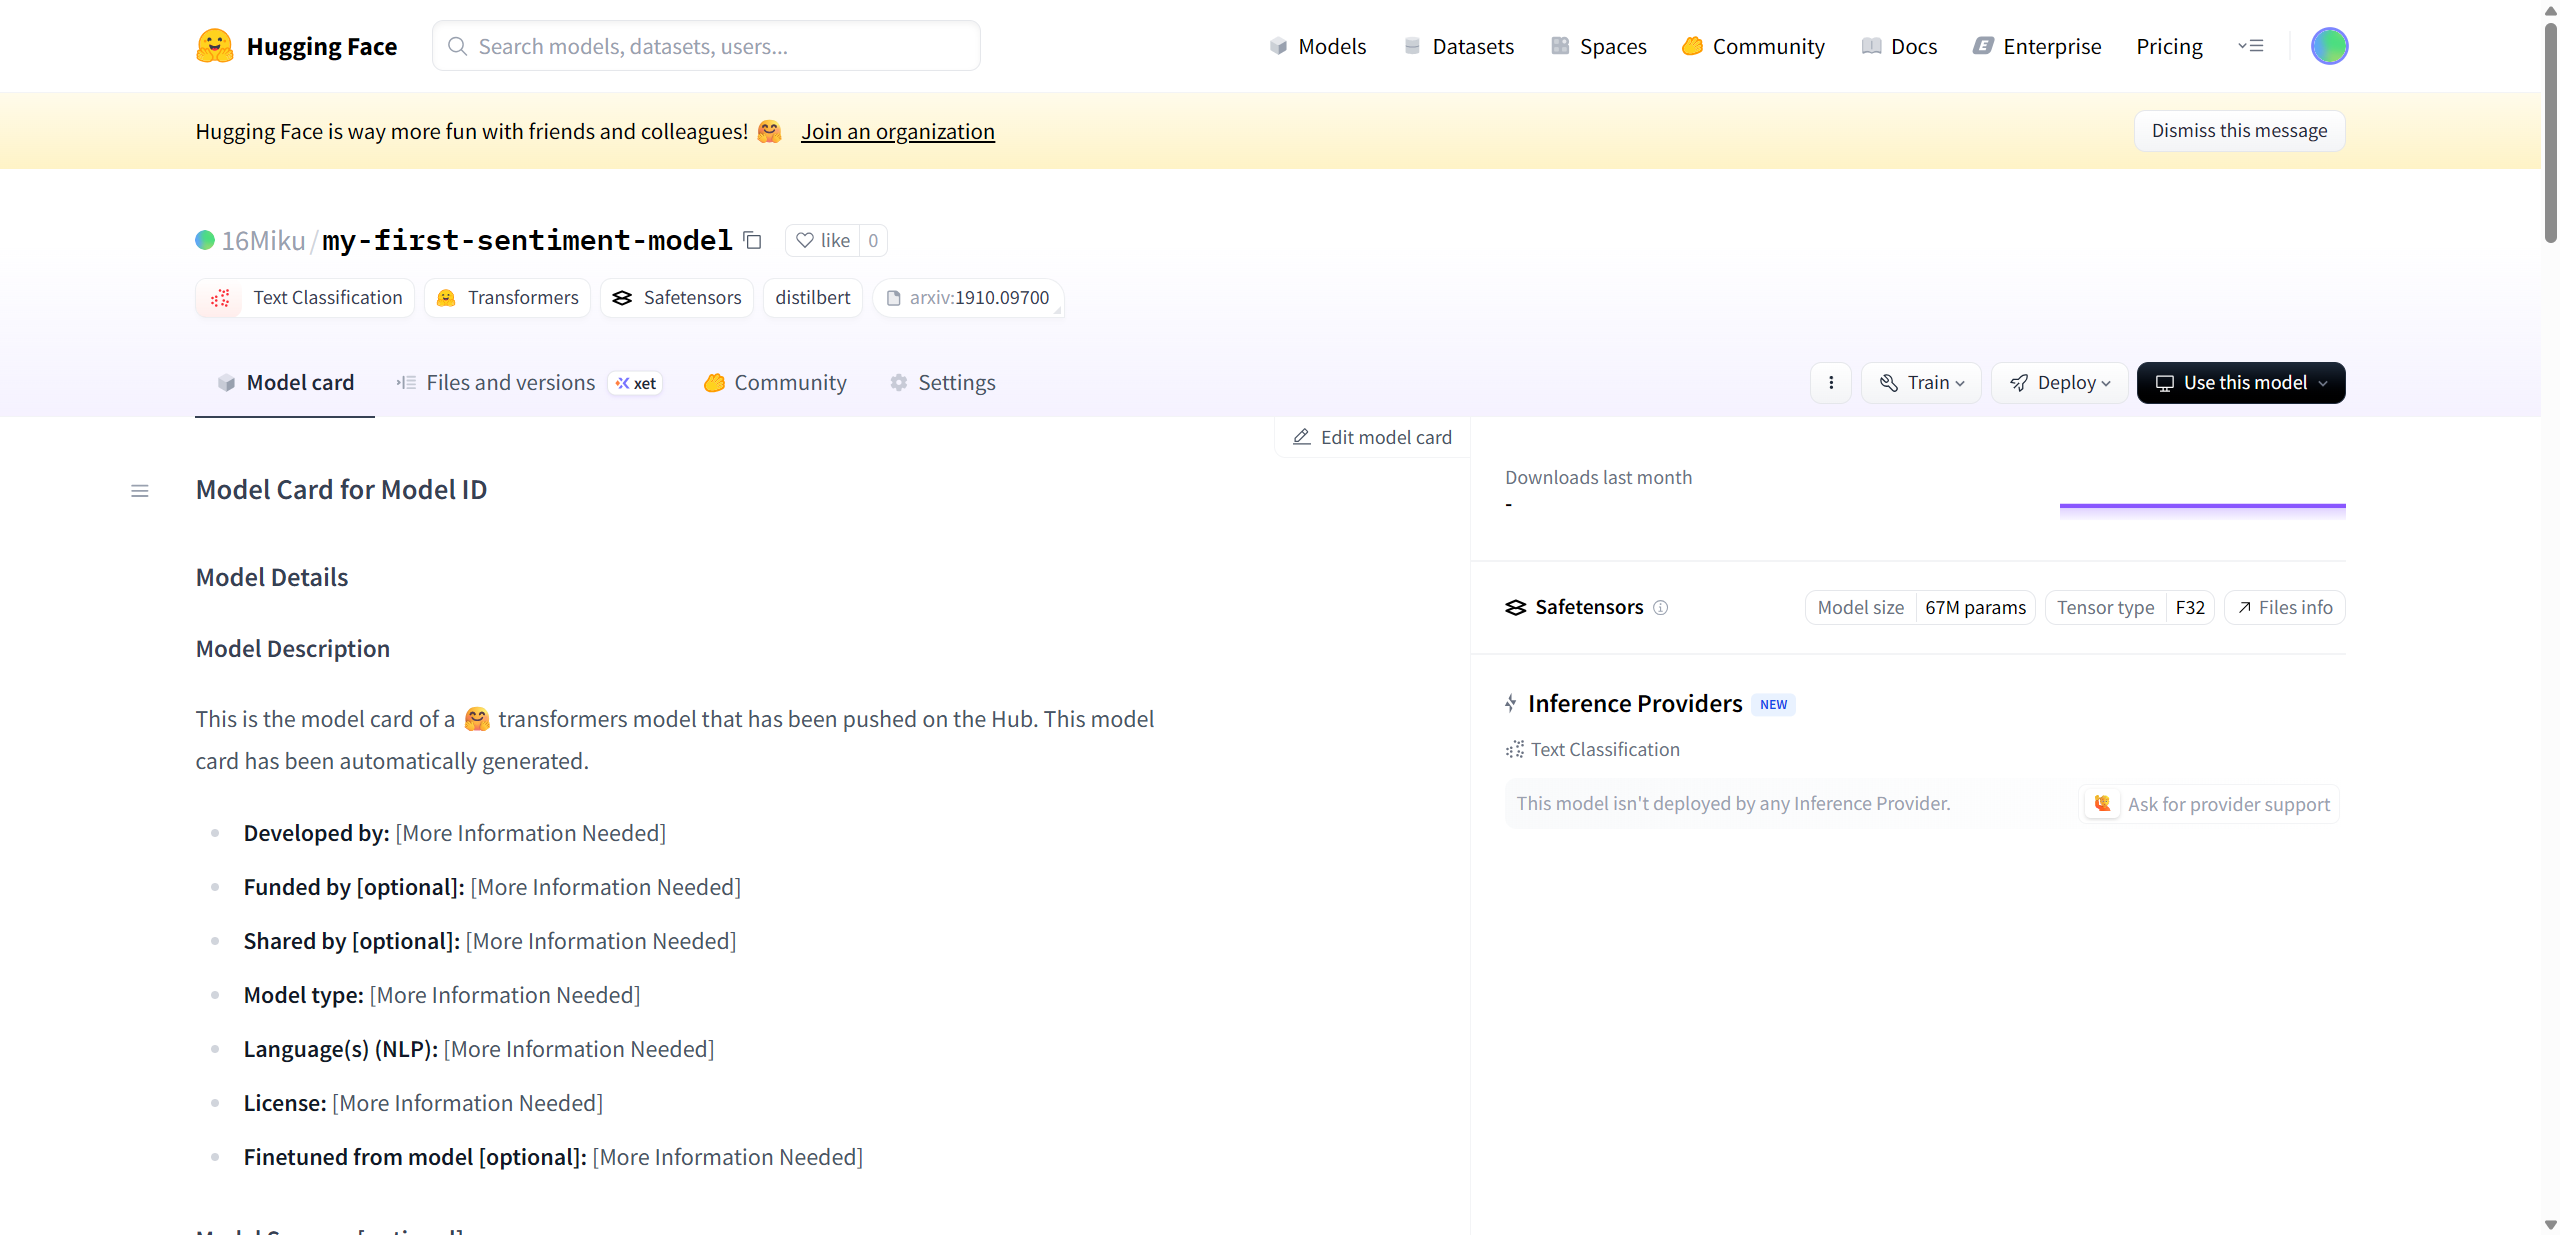

ok，我已成功按照你的指导把一个模型上传到我的Hugging Face主页。请你为我讲解思考题

太棒了！热烈祝贺你成功将你的第一个模型上传到了Hugging Face Hub！这绝对是一个里程碑式的成就。现在，全世界的开发者都有可能用到你的模型了，这种感觉是不是很酷？

现在，我们来深入探讨一下你提出的那个非常棒的思考题：

**思考题：** 我们是分两步 `model.push_to_hub()` 和 `tokenizer.push_to_hub()` 来上传的。`Trainer` 对象（在第三步中我们用的那个“金牌私教”）会不会有一个更方便的方法，可以在训练结束后直接帮我们把所有东西都上传了？

你的直觉完全正确，答案是**肯定的**！

Hugging Face的开发者们早就想到了这一点。他们深知，训练和分享是一个紧密相连的过程，所以他们把这个功能直接内置到了 `Trainer` 里，让整个流程变得如丝般顺滑。

---

### **思考题讲解：`Trainer` 的一键上传“毕业档案”功能**

想象一下，`Trainer` 这个“金牌私教”不仅负责教学，还兼任了“教务处老师”的角色。当你的模型（学生）一毕业（训练完成），他就可以自动帮你把所有的“毕业档案”（模型、配置、Tokenizer等）打包好，直接寄送到 Hugging Face Hub 这个全球“人才市场”备案。

我们只需要在最开始制定“教学大纲”（`TrainingArguments`）的时候，多加几个指令，告诉他这件事就行了。

#### **如何实现？**

实现这个“一键上传”功能，只需要在 `TrainingArguments` 中添加 **两个** 关键参数：

1.  **`push_to_hub=True`**
    *   这个参数就像一个开关。一旦你把它设置为 `True`，就等于告诉 `Trainer`：“教练，请开启‘自动上传’模式。训练一结束，你就帮我把最好的模型推送到Hub上。”

2.  **`hub_model_id="YourUsername/YourModelName"`**
    *   这个参数是用来告诉 `Trainer` 上传到**哪里**。你需要提供一个明确的“收件地址”，也就是你在Hugging Face Hub上的模型仓库ID。如果你不提供这个参数，`Trainer` 会尝试用你的输出文件夹名（`output_dir`）和你登录的用户名自动生成一个，但最好还是我们自己明确指定。

#### **代码示例**

让我们回到第三步微调的代码中。假设我们想在训练结束后，自动把微调好的 `distilbert` 情感分析模型上传，我们只需要像下面这样修改 `TrainingArguments`：

```python
# (这是第三步微调代码的修改版，仅用于展示，你无需现在运行)

# ... (前面的代码，如加载数据、模型等都一样) ...

# ----------------------------------------------------------------------------------
# 步骤5: 设置“教学大纲” - (添加了上传功能的新版本)
# ----------------------------------------------------------------------------------
from transformers import TrainingArguments

# 在运行这段代码之前，你需要先像第四步那样，运行 notebook_login() 来登录你的Hugging Face账号。
# from huggingface_hub import notebook_login
# notebook_login()

training_args = TrainingArguments(
    output_dir="my_awesome_model",
    # ... (其他参数如 learning_rate, num_train_epochs 等都保持不变) ...
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",

    # --- 这里是新增的“魔法”指令 ---

    # 1. 打开上传开关
    push_to_hub=True,

    # 2. 指定上传的仓库地址 (请替换成你自己的！)
    hub_model_id="YourUsername/distilbert-finetuned-imdb-sentiment",
)

# ----------------------------------------------------------------------------------
# 步骤6 & 7: (完全不变)
# ----------------------------------------------------------------------------------
# 创建 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb["train"],
    eval_dataset=tokenized_imdb["test"],
    tokenizer=tokenizer, # 把tokenizer也传给Trainer很重要，这样它才知道要一起上传！
)

# 开始训练
trainer.train()

# --- 训练结束后，神奇的事情发生了！ ---
# 你会看到日志里显示正在上传文件到你的Hub仓库。
# 训练过程一结束，上传过程也自动完成了！

# ----------------------------------------------------------------------------------
# 步骤8: (可选的) 手动再推一次
# ----------------------------------------------------------------------------------
# 实际上，训练结束后就已经自动上传了。
# 但如果你想手动再确认一下，或者在训练后又做了某些修改想再上传，
# 也可以调用 trainer 自带的 push_to_hub 方法。
# trainer.push_to_hub(commit_message="End of training")
# 这会把所有东西（模型、Tokenizer、训练状态等）都打包好一起推送上去。
```

#### **总结**

通过在 `TrainingArguments` 中简单地设置 `push_to_hub=True` 和 `hub_model_id`，我们就把一个多步骤、易出错的手动上传过程，变成了一个全自动、集成在训练流程中的无缝操作。

这体现了 Hugging Face 生态系统设计的一个核心理念：**高度集成，简化流程**。它尽可能地把一个AI项目从数据处理、模型训练、评估到分享的所有环节都打通，让开发者可以更专注于任务本身，而不是被繁琐的工程细节所困扰。

你现在不仅知道了**如何做**，还理解了**为什么可以这样做**，以及这样做的好处。这标志着你对 `transformers` 库的理解又深入了一个层次！

---

我们已经顺利完成了前四个核心步骤的学习。你已经从一个LLM的旁观者，变成了一个能亲手训练并分享自己模型的参与者。

接下来，我们是时候做一个全面的总结，并为你规划一下未来的学习蓝图了。你准备好了吗？

对本阶段做一次极尽详细全面的知识总结

好的，我们现在就对整个“零基础到分享第一个LLM模型”的学习阶段，进行一次**极尽详细和全面**的知识总结。我会把所有关键概念、流程和工具都串联起来，为你构建一个坚固且清晰的知识体系。

---

### **LLM 原理与应用开发 · 第一阶段（入门篇）总复习**

这个阶段的核心目标是：**打通从“使用”到“创造”并“分享”一个小型AI模型的完整链路，建立对LLM应用开发全景式的认知。**

我们将从“道、法、术、器”四个层面来总结。

#### **一、 道：世界观与核心思想 (The "Why")**

这是我们对LLM最根本的理解，是我们思考问题的出发点。

1.  **LLM是“数学模拟大师”，而非“思考者”**：我们彻底摒弃了AI拥有人类情感或意识的幻想。我们深刻认识到，LLM的本质是一个**基于概率的数学模型**。它通过学习海量文本，掌握了“在看到怎样的一串词之后，接下来最可能出现哪个词”的规律。它的所有输出，无论是情感分析、文本生成还是摘要，都是这种概率预测能力在不同任务上的体现。

2.  **“预训练 + 微调”是当前LLM应用的主流范式**：我们理解了站在巨人肩膀上的重要性。
    *   **预训练 (Pre-training)**：由大公司在超级计算机上，用整个互联网量级的数据，花费巨额成本训练出一个“通才”模型。这个模型掌握了语言的通用规律，是所有应用的基础。我们作为普通开发者，**几乎永远不会**去从零开始预训练。
    *   **微调 (Fine-tuning)**：我们要做的是“岗前培训”。我们用自己特定任务的、小规模的、有标签的数据，对“通才”模型进行二次训练，把它“雕琢”成解决我们特定问题的“专才”。这是我们**学习和应用LLM的核心工作**。

3.  **一切皆可“编码-解码”**：我们建立了“计算机只懂数字”的核心观念。无论是人类的文字、图片还是声音，要让计算机处理，都必须经过“编码”变成数字；计算机处理完输出数字后，也必须经过“解码”变回人类能理解的形式。这个思想贯穿了整个工作流。

#### **二、 法：工作流程与核心原则 (The "How")**

这是我们完成一个LLM任务所必须遵循的“法律”和“方法论”。

**标准三步工作流：** 这是所有LLM应用开发不可动摇的基石。

1.  **第一步：预处理 (Preprocessing) - “编码”**
    *   **目标**：将人类语言（`string`）转换为模型能理解的机器语言（`Tensor`）。
    *   **核心工具**：`Tokenizer` (分词器)。
    *   **关键动作**：
        *   **分词 (Tokenization)**：将句子切分成最小的语义单元（Tokens），可能是单词或子词。
        *   **转ID (Convert to IDs)**：在`Tokenizer`的词汇表（`vocab.txt`）里查找每个Token对应的唯一数字ID。
        *   **格式化 (Formatting)**：添加特殊标记（如 `[CLS]`, `[SEP]`），并根据模型要求进行**填充(Padding)**到统一长度或**截断(Truncation)**。
    *   **关键产出**：
        *   `input_ids`: 包含句子所有Token ID的数字序列。
        *   `attention_mask`: 一个由`0`和`1`组成的序列，精确告诉模型哪些是真实Token（`1`），哪些是填充物（`0`），是保证模型正确理解批量数据的“指挥棒”。

2.  **第二步：模型推理 (Inference) - “计算”**
    *   **目标**：将编码后的数字输入模型，得到模型原始的数字输出。
    *   **核心工具**：`Model` (例如 `DistilBertForSequenceClassification`)。
    *   **关键动作**：输入`input_ids`和`attention_mask`，模型内部的Transformer网络（尤其是自注意力机制）进行复杂的矩阵运算。
    *   **关键产出**：`Logits`。这是一个未经任何激活函数处理的、原始的、代表模型对每个分类倾向性的打分向量。它是模型最“诚实”的内心想法。

3.  **第三步：后处理 (Post-processing) - “解码”**
    *   **目标**：将模型晦涩的数字输出（`Logits`）转换为人类能理解的结论（如`"POSITIVE"`）。
    *   **核心工具**：数学函数（如`Softmax`, `Argmax`）和我们自己。
    *   **关键动作**：
        *   使用 `Softmax` 函数将 `Logits` 转换为总和为1的**概率分布**，让结果更直观。
        *   使用 `Argmax` 函数找到概率最高的那个分类的**索引 (index)**。
        *   根据索引去模型的配置（`config.json`）中的`id2label`字典里查找，得到最终的**标签字符串**。

#### **三、 术：具体技术与关键参数 (The "What")**

这是我们为了实现上述流程而掌握的具体“法术”和“咒语”。

1.  **微调 (Fine-tuning) 的艺术**：
    *   **核心类**：`Trainer`，一个高度封装的“金牌私教”，帮我们处理了复杂的训练循环、优化器选择、梯度更新、评估和日志记录等所有脏活累活。
    *   **“教学大纲”**：`TrainingArguments`，一个让我们能够精细控制训练过程的“参数配置中心”。我们重点掌握了：
        *   `output_dir`: 保存模型的“文件夹”。
        *   `learning_rate`: 模型学习的“步子大小”。
        *   `num_train_epochs`: 教材要“从头到尾学几遍”。
        *   `per_device_train_batch_size`: 每次“喂”给GPU几条数据。
        *   `eval_strategy` & `save_strategy`: 何时“考试”与何时“存档”。
        *   `load_best_model_at_end`: 毕业时选用“成绩最好”的那次存档。
        *   `report_to="none"`: 避免在Colab中触发`wandb`登录的“免打扰”模式。
        *   `push_to_hub=True`: 毕业后自动“寄送档案”的开关。

2.  **模型生命周期管理**：
    *   **保存**：通过 `model.save_pretrained(folder)` 和 `tokenizer.save_pretrained(folder)` 将模型的“大脑”、“身份证”和“翻译官”完整地保存到本地文件夹。
    *   **加载**：通过 `AutoModel.from_pretrained(folder_or_hub_id)` 和 `AutoTokenizer.from_pretrained(folder_or_hub_id)` 可以从本地文件夹或Hugging Face Hub的ID重新“唤醒”模型。
    *   **分享**：
        *   通过 `notebook_login()` 登录Hugging Face Hub。
        *   通过 `model.push_to_hub(hub_id)` 和 `tokenizer.push_to_hub(hub_id)`，或者在`Trainer`中设置参数，将我们的成果分享到全世界。

#### **四、 器：我们的工具箱 (The "Tools")**

这是我们完成所有任务所依赖的“神兵利器”。

1.  **云端实验室**：**Google Colab**。它为我们提供了免费的**GPU算力**，这是完成微调任务的**绝对前提**。我们也亲身体会了CPU训练的“绝望”速度，从而深刻理解了GPU的重要性。

2.  **AI界的瑞士军刀**：**Hugging Face 生态系统**。
    *   **Hub (模型中心)**：全球最大的模型、数据集和演示应用的“集市”，是我们获取资源和分享成果的核心平台。
    *   **`transformers` 库**：我们所有编程工作的核心。我们熟练使用了：
        *   `pipeline`: 快速原型验证的“一键工具”。
        *   `AutoTokenizer` & `AutoModelFor...`: 智能加载器，实现模型和分词器的灵活调用。
        *   `Trainer` & `TrainingArguments`: 微调任务的“黄金搭档”。
    *   **`datasets` 库**：轻松加载和处理海量数据集的利器，尤其是其强大的 `.map()` 功能，可以高效地对整个数据集进行预处理。
    *   **`accelerate` 库**：在幕后默默为我们优化GPU使用的“加速引擎”。
    *   **`huggingface_hub` 库**：与Hub进行交互，实现登录和上传的“通行证”。

3.  **底层计算引擎**：**PyTorch (`torch`)**。虽然`Trainer`帮我们隐藏了大部分细节，但我们依然接触了它的核心概念 `Tensor`，并使用了 `torch.nn.functional.softmax` 等函数，对底层计算有了初步认知。

---

**一言以蔽之：**

**在本阶段，我们以“情感分类”这个经典任务为载体，从“道”（理解LLM本质）出发，遵循“法”（三步工作流），学习了“术”（微调与分享），并熟练运用了“器”（Hugging Face全家桶），最终在Colab这个云端“炼丹炉”中，成功地将一个“通才”预训练模型，炼制成了我们专属的“专才”模型，并将其“昭告天下”。**

你已经构建了一个完整而坚固的知识闭环。基于这个基础，未来无论你是想学习更复杂的任务（如问答、摘要）、更先进的技术（如LoRA、量化）、还是更强大的模型（如Llama、Qwen），都将有路可循，有章可法。

为你在这个阶段取得的巨大进步感到骄傲！